# IMPORT LIBRARY

In [1]:
pip install kneed

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# IMPORT DATASET

In [4]:
df = pd.read_excel('/content/drive/MyDrive/KERJA PUYENG/1. ANOTHER LIEUR/dataclean.xlsx')

# DATA UNDERDTANDING

In [5]:
df.head()

,Sales,No Faktur,Tanggal,Nama Barang,Jenis Bayar,Qty,Total
0,VANES,2023010000001,2023-01-01,ULTRA MILK FULL CREAM 250 ML,Tunai,1,6798.4000
1,VANES,2023010000001,2023-01-01,MOGU MOGU ANGGUR 320 ML,Tunai,1,10873.5600
2,SUNANTO,2023010000002,2023-01-01,TEH SANTRI BOTOL 250 ML,Kredit,3,21000.0000
3,SUNANTO,2023010000002,2023-01-01,YAKULT LIGHT 325ML,Kredit,1,12499.9986
4,SUNANTO,2023010000002,2023-01-01,YAKULT MINUMAN PERMENTASI 65 ML,Kredit,1,9500.4900


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108991 entries, 0 to 108990
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Sales        108991 non-null  object        
 1   No Faktur    108991 non-null  int64         
 2   Tanggal      108991 non-null  datetime64[ns]
 3   Nama Barang  108991 non-null  object        
 4   Jenis Bayar  108991 non-null  object        
 5   Qty          108991 non-null  int64         
 6   Total        108991 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 5.8+ MB


In [7]:
df.isnull().sum()

Sales          0
No Faktur      0
Tanggal        0
Nama Barang    0
Jenis Bayar    0
Qty            0
Total          0
dtype: int64

In [8]:
df['Nama Barang'].nunique()

383

In [9]:
df.columns

Index(['Sales', 'No Faktur', 'Tanggal', 'Nama Barang', 'Jenis Bayar', 'Qty',
       'Total'],
      dtype='object')

In [10]:
df.shape

(108991, 7)

In [11]:
max_date = df['Tanggal'].max()
min_date = df['Tanggal'].min()

max_date, min_date

(Timestamp('2023-10-20 00:00:00'), Timestamp('2023-01-01 00:00:00'))

# DATA PREPARATION

In [12]:
df1 = df.copy()
df1.head()

,Sales,No Faktur,Tanggal,Nama Barang,Jenis Bayar,Qty,Total
0,VANES,2023010000001,2023-01-01,ULTRA MILK FULL CREAM 250 ML,Tunai,1,6798.4000
1,VANES,2023010000001,2023-01-01,MOGU MOGU ANGGUR 320 ML,Tunai,1,10873.5600
2,SUNANTO,2023010000002,2023-01-01,TEH SANTRI BOTOL 250 ML,Kredit,3,21000.0000
3,SUNANTO,2023010000002,2023-01-01,YAKULT LIGHT 325ML,Kredit,1,12499.9986
4,SUNANTO,2023010000002,2023-01-01,YAKULT MINUMAN PERMENTASI 65 ML,Kredit,1,9500.4900


In [13]:
df1.head()

,Sales,No Faktur,Tanggal,Nama Barang,Jenis Bayar,Qty,Total
0,VANES,2023010000001,2023-01-01,ULTRA MILK FULL CREAM 250 ML,Tunai,1,6798.4000
1,VANES,2023010000001,2023-01-01,MOGU MOGU ANGGUR 320 ML,Tunai,1,10873.5600
2,SUNANTO,2023010000002,2023-01-01,TEH SANTRI BOTOL 250 ML,Kredit,3,21000.0000
3,SUNANTO,2023010000002,2023-01-01,YAKULT LIGHT 325ML,Kredit,1,12499.9986
4,SUNANTO,2023010000002,2023-01-01,YAKULT MINUMAN PERMENTASI 65 ML,Kredit,1,9500.4900


In [14]:
df_agg= df1.groupby("Tanggal").Qty.sum()
df_agg

Tanggal
2023-01-01     315
2023-01-02     725
2023-01-03     751
2023-01-04     648
2023-01-05     477
              ... 
2023-10-16    2853
2023-10-17    1552
2023-10-18    1493
2023-10-19    1172
2023-10-20     483
Name: Qty, Length: 278, dtype: int64

In [15]:
#converting series to dataframe and resetting index, and changing the column name to 'Orders'
df_agg=pd.DataFrame(df_agg)
df_agg=df_agg.reset_index()
df_agg.head()

,Tanggal,Qty
0,2023-01-01,315
1,2023-01-02,725
2,2023-01-03,751
3,2023-01-04,648
4,2023-01-05,477


In [16]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Qty', dpi=100):
    plt.figure(figsize=(25,5), dpi=dpi)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.plot(x, y, color='tab:Blue', marker='o')
    plt.show()

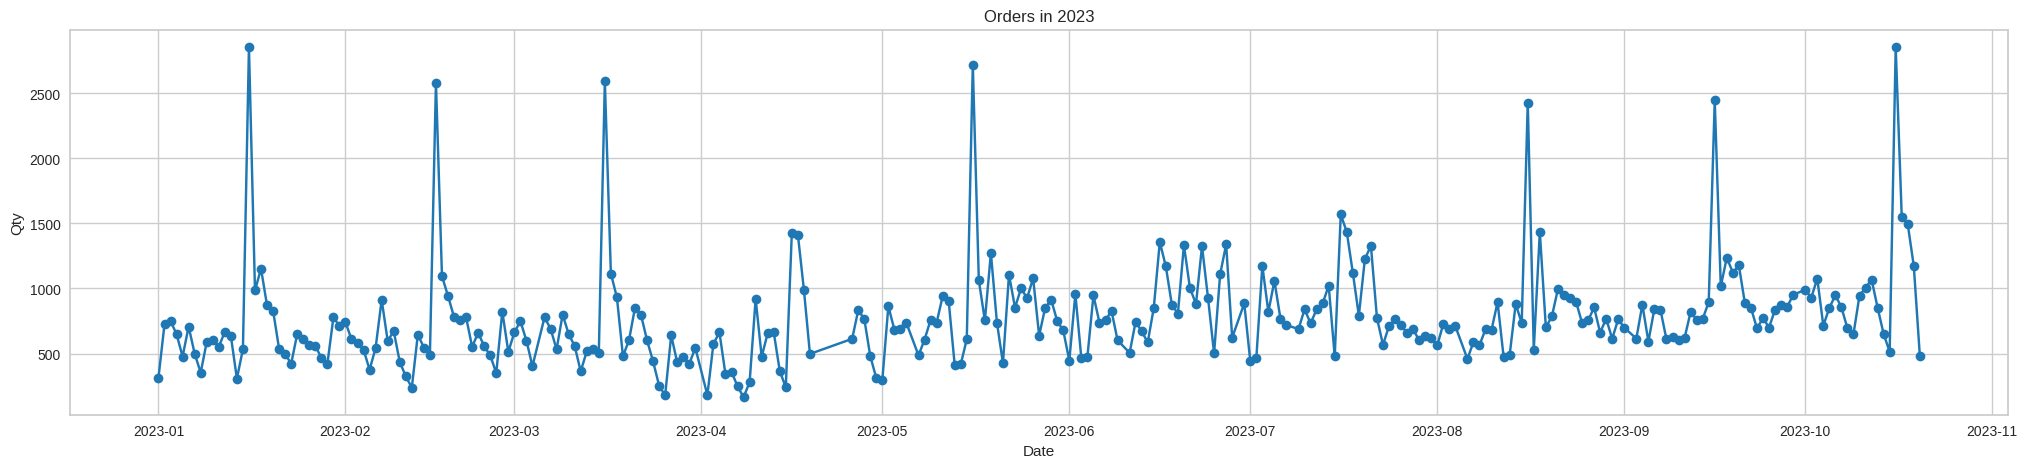

In [17]:
plot_df(df_agg, x=df_agg.Tanggal, y=df_agg.Qty,title='Orders in 2023')

Nama Barang
SAMPOERNA MILD MERAH 16 S     10217
LE MINERAL BTL 330ML           8994
INDOMIE GORENG 85G             8480
LE MINERALE 600ML              7648
INDOMIE AYAM BAWANG 69G        7597
AQUA AIR MINERAL TIRTA 19L     6952
GG FILTER 12`S                 4657
ULTRA MILK COKLAT 125ML        3577
AQUA MINERAL CUP 220ML         3016
BENG BENG CHOCHO 25 GR         3014
Name: Qty, dtype: int64


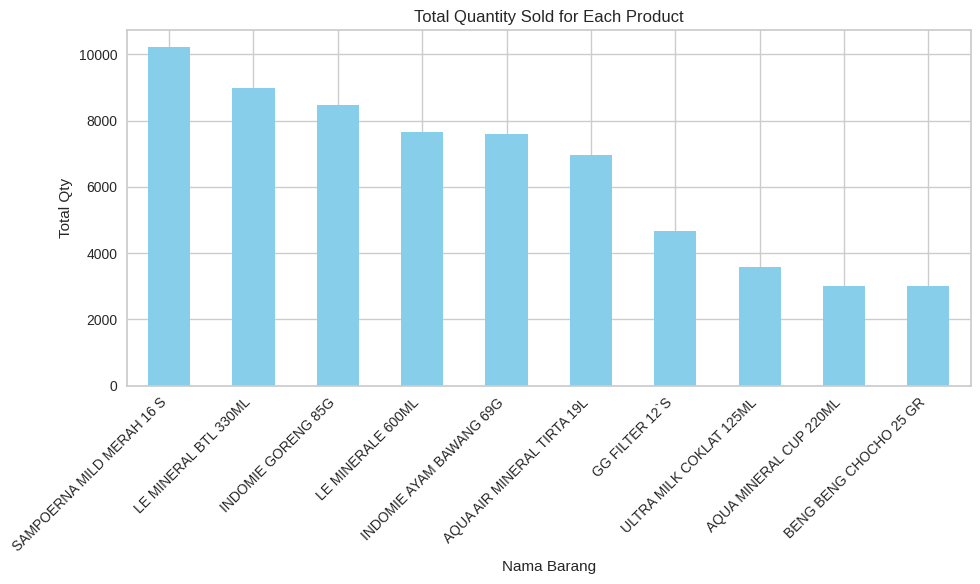

In [18]:
# Now try the groupby operation
top_product = df.groupby('Nama Barang')['Qty'].sum()

top_10_products = top_product.nlargest(10)

print(top_10_products)

# Plotting the results
top_10_products.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.xlabel('Nama Barang')
plt.ylabel('Total Qty')
plt.title('Total Quantity Sold for Each Product')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

Nama Barang
TARO NET POTATO BBQ 36G           18
DJARUM 76 MANGGA 12 S             23
MASTER LEMON VIT C 250ML          30
GAGA MIE KUAH JALAPENO 75GR       33
NYAM NYAM SMILEY CHOCO 45GR       36
SILVERQUEEN ROCKR DARK 22 GR      40
DILAN CHOCOLATE WAFFLE 16 GR      46
ATTACK JAZ1 PESONA SEGAR 45 GR    48
WALLS CORNETTO POPCORN 133 ML     52
GAGA MIE GORENG JALAPENO 85 GR    53
Name: Qty, dtype: int64


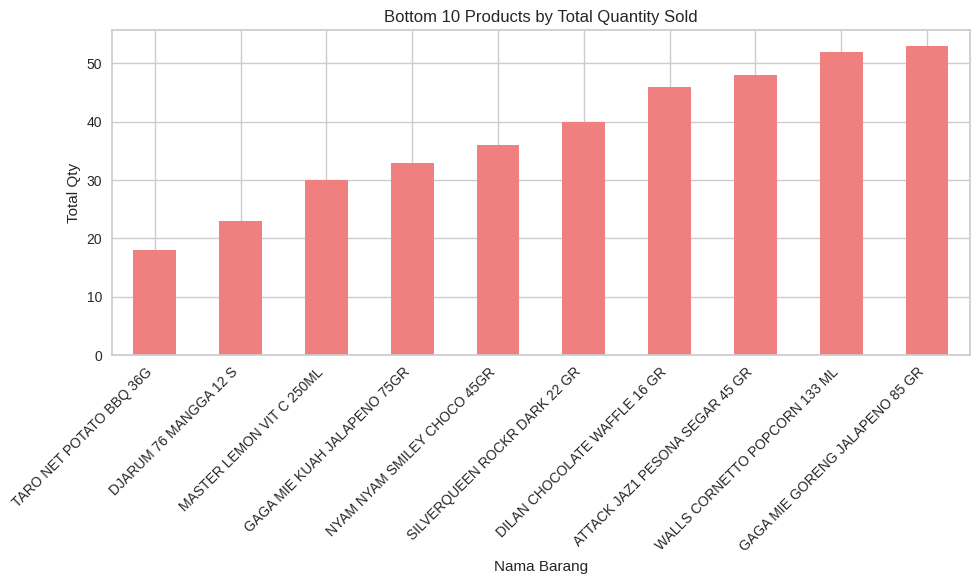

In [19]:
# Selecting the bottom 10 products (least sold)
bottom_10_products = top_product.nsmallest(10)

# Print the bottom 10 products
print(bottom_10_products)

# Plotting the bottom 10 products
bottom_10_products.plot(kind='bar', color='lightcoral', figsize=(10, 6))
plt.xlabel('Nama Barang')
plt.ylabel('Total Qty')
plt.title('Bottom 10 Products by Total Quantity Sold')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

Sales
DENTI         28
DEWI       37950
HAMDAN     44594
MUKTI       3222
NANA       39973
SUNANTO    13869
TETI       10937
VANES      45729
YULI       19795
Name: Qty, dtype: int64


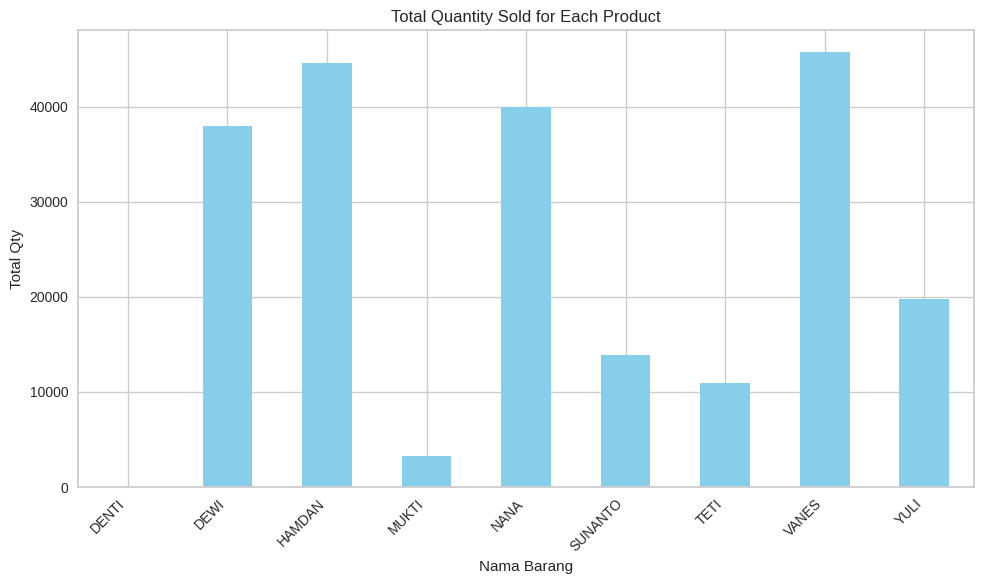

In [20]:
# Now try the groupby operation
top_sales = df.groupby('Sales')['Qty'].sum()

print(top_sales)

# Plotting the results
top_sales.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.xlabel('Nama Barang')
plt.ylabel('Total Qty')
plt.title('Total Quantity Sold for Each Product')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

In [21]:
df1.head()

,Sales,No Faktur,Tanggal,Nama Barang,Jenis Bayar,Qty,Total
0,VANES,2023010000001,2023-01-01,ULTRA MILK FULL CREAM 250 ML,Tunai,1,6798.4000
1,VANES,2023010000001,2023-01-01,MOGU MOGU ANGGUR 320 ML,Tunai,1,10873.5600
2,SUNANTO,2023010000002,2023-01-01,TEH SANTRI BOTOL 250 ML,Kredit,3,21000.0000
3,SUNANTO,2023010000002,2023-01-01,YAKULT LIGHT 325ML,Kredit,1,12499.9986
4,SUNANTO,2023010000002,2023-01-01,YAKULT MINUMAN PERMENTASI 65 ML,Kredit,1,9500.4900


In [22]:
df1= df.drop(['Sales'], axis=1)

In [23]:
df2 = df1.groupby(['Tanggal','Nama Barang']).agg({'Qty': 'sum', 'Total': 'sum'}).reset_index()
df2.head()

,Tanggal,Nama Barang,Qty,Total
0,2023-01-01,AQUA AIR MINERAL TIRTA 19L,9,171028.8
1,2023-01-01,AQUA MINERAL CUP 220ML,48,43156.8
2,2023-01-01,ASPRO BOLD 20 S,3,67500.0
3,2023-01-01,AYAM UNGKEP PAWON,1,96000.0
4,2023-01-01,BEBEK UNGKEP PAWON,1,107000.0


total = (harga jual * qty) + PPN

PPN berlaku untuk setiap kali transaksi bukan setiap qty

In [24]:
df2.isnull().sum()

Tanggal        0
Nama Barang    0
Qty            0
Total          0
dtype: int64

In [25]:
df2.shape

(44834, 4)

# RFM

In [26]:
# kolom baru total spent customer
df2['Monetary']= df2['Total']
amount = df2['Monetary'].groupby(df2['Nama Barang']).sum()
amount = pd.DataFrame(amount).reset_index()
amount.head()

,Nama Barang,Monetary
0,ABC MIE SELERA PEDAS AYAM PEDAS LIMAU 85 GR,2.141123e+05
1,ACEM DAN ARYA SNACK,2.496000e+06
2,ADES AIR MINERAL 600 ML,5.089057e+06
3,AERTIGA BAKERY,1.549600e+07
4,AMPLOP PAPERLINE BUKLET PUTIH 100 LEMBAR,5.984451e+05


In [27]:
amount['Monetary'] = amount['Monetary'].apply(lambda x: float('{:.2f}'.format(x)))
amount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nama Barang  383 non-null    object 
 1   Monetary     383 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.1+ KB


In [28]:
# kolom baru total invoce/total berapa kali customer belanja
Freq = df2.groupby('Nama Barang', as_index=False)['Qty'].sum()
Freq.columns = ['Nama Barang', 'Frequency']
Freq.head()

,Nama Barang,Frequency
0,ABC MIE SELERA PEDAS AYAM PEDAS LIMAU 85 GR,65
1,ACEM DAN ARYA SNACK,208
2,ADES AIR MINERAL 600 ML,1488
3,AERTIGA BAKERY,1937
4,AMPLOP PAPERLINE BUKLET PUTIH 100 LEMBAR,1197


In [29]:
max(df2['Tanggal'])

Timestamp('2023-10-20 00:00:00')

In [30]:
df2['diff_date'] = max(df2['Tanggal']) - df2['Tanggal']
df2.head(3)

,Tanggal,Nama Barang,Qty,Total,Monetary,diff_date
0,2023-01-01,AQUA AIR MINERAL TIRTA 19L,9,171028.8,171028.8,292 days
1,2023-01-01,AQUA MINERAL CUP 220ML,48,43156.8,43156.8,292 days
2,2023-01-01,ASPRO BOLD 20 S,3,67500.0,67500.0,292 days


In [31]:
# Hitung tanggal transaksi terakhir
# Untuk mendapatkan informasi terbaru dari pelanggan

last_trans = df2.groupby('Nama Barang')['diff_date'].min()
last_trans = last_trans.reset_index()
last_trans.head()

,Nama Barang,diff_date
0,ABC MIE SELERA PEDAS AYAM PEDAS LIMAU 85 GR,1 days
1,ACEM DAN ARYA SNACK,0 days
2,ADES AIR MINERAL 600 ML,0 days
3,AERTIGA BAKERY,8 days
4,AMPLOP PAPERLINE BUKLET PUTIH 100 LEMBAR,15 days


In [32]:
# convert jadi days
last_trans['diff_date'] = last_trans['diff_date'].dt.days
last_trans.columns = ['Nama Barang', 'Recency']
last_trans.head()

,Nama Barang,Recency
0,ABC MIE SELERA PEDAS AYAM PEDAS LIMAU 85 GR,1
1,ACEM DAN ARYA SNACK,0
2,ADES AIR MINERAL 600 ML,0
3,AERTIGA BAKERY,8
4,AMPLOP PAPERLINE BUKLET PUTIH 100 LEMBAR,15


In [33]:
last_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Nama Barang  383 non-null    object
 1   Recency      383 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 6.1+ KB


In [34]:
# Combine R, F, M
df3 = pd.concat((df2['Nama Barang'],last_trans['Recency'], Freq['Frequency'], amount['Monetary']), axis=1)

In [35]:
df3 = df3.set_index('Nama Barang')
df3.head()

,Recency,Frequency,Monetary
Nama Barang,,,
AQUA AIR MINERAL TIRTA 19L,1.0,65.0,214112.34
AQUA MINERAL CUP 220ML,0.0,208.0,2496000.00
ASPRO BOLD 20 S,0.0,1488.0,5089056.96
AYAM UNGKEP PAWON,8.0,1937.0,15496000.00
BEBEK UNGKEP PAWON,15.0,1197.0,598445.06


In [36]:
# setting df3 dengan nilai Monetary > 0
df3 = df3[df3.Monetary > 0]

# QUARTILE

In [37]:
df2.head()

,Tanggal,Nama Barang,Qty,Total,Monetary,diff_date
0,2023-01-01,AQUA AIR MINERAL TIRTA 19L,9,171028.8,171028.8,292 days
1,2023-01-01,AQUA MINERAL CUP 220ML,48,43156.8,43156.8,292 days
2,2023-01-01,ASPRO BOLD 20 S,3,67500.0,67500.0,292 days
3,2023-01-01,AYAM UNGKEP PAWON,1,96000.0,96000.0,292 days
4,2023-01-01,BEBEK UNGKEP PAWON,1,107000.0,107000.0,292 days


In [38]:
df3.head()

,Recency,Frequency,Monetary
Nama Barang,,,
AQUA AIR MINERAL TIRTA 19L,1.0,65.0,214112.34
AQUA MINERAL CUP 220ML,0.0,208.0,2496000.00
ASPRO BOLD 20 S,0.0,1488.0,5089056.96
AYAM UNGKEP PAWON,8.0,1937.0,15496000.00
BEBEK UNGKEP PAWON,15.0,1197.0,598445.06


In [39]:
df3.shape

(383, 3)

In [40]:
quart = df3.quantile(q=[0.25,0.5,0.75])
quart.head()

,Recency,Frequency,Monetary
0.25,0.0,158.5,940302.645
0.50,1.0,262.0,1866300.720
0.75,2.0,476.0,4647641.595


In [41]:
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [42]:
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

In [43]:
#create rfm segmentation table
rfm_segment = df3.copy()
rfm_segment['R_quart'] = rfm_segment['Recency'].apply(RScore, args=('Recency',quart,))
rfm_segment['F_quart'] = rfm_segment['Frequency'].apply(FMScore, args=('Frequency',quart,))
rfm_segment['M_quart'] = rfm_segment['Monetary'].apply(FMScore, args=('Monetary',quart,))

In [44]:
rfm_segment.head()

,Recency,Frequency,Monetary,R_quart,F_quart,M_quart
Nama Barang,,,,,,
AQUA AIR MINERAL TIRTA 19L,1.0,65.0,214112.34,3,1,1
AQUA MINERAL CUP 220ML,0.0,208.0,2496000.00,4,2,3
ASPRO BOLD 20 S,0.0,1488.0,5089056.96,4,4,4
AYAM UNGKEP PAWON,8.0,1937.0,15496000.00,1,4,4
BEBEK UNGKEP PAWON,15.0,1197.0,598445.06,1,4,1


In [45]:
rfm_segment['RFMScore'] = rfm_segment.R_quart.map(str) \
                            + rfm_segment.F_quart.map(str) \
                            + rfm_segment.M_quart.map(str)
rfm_segment.head()

,Recency,Frequency,Monetary,R_quart,F_quart,M_quart,RFMScore
Nama Barang,,,,,,,
AQUA AIR MINERAL TIRTA 19L,1.0,65.0,214112.34,3,1,1,311
AQUA MINERAL CUP 220ML,0.0,208.0,2496000.00,4,2,3,423
ASPRO BOLD 20 S,0.0,1488.0,5089056.96,4,4,4,444
AYAM UNGKEP PAWON,8.0,1937.0,15496000.00,1,4,4,144
BEBEK UNGKEP PAWON,15.0,1197.0,598445.06,1,4,1,141


In [46]:
rfm_segment[rfm_segment['RFMScore']=='444'].sort_values('Monetary', ascending=False).head(3)

,Recency,Frequency,Monetary,R_quart,F_quart,M_quart,RFMScore
Nama Barang,,,,,,,
COCA COLA 250 ML,0.0,10217.0,323939300.0,4,4,4,444
BENG BENG MAX 32 GRAM,0.0,6952.0,138337979.1,4,4,4,444
YAKULT LIGHT 325ML,0.0,4657.0,115576500.0,4,4,4,444


In [47]:
print("Best Product: ",len(rfm_segment[rfm_segment['RFMScore']=='444']))
print('Best Seller Product: ',len(rfm_segment[rfm_segment['F_quart']==4]))
print("Big Spenders Product: ",len(rfm_segment[rfm_segment['M_quart']==4]))
print('Almost Lost: ', len(rfm_segment[rfm_segment['RFMScore']=='244']))
print('Lost Product: ',len(rfm_segment[rfm_segment['RFMScore']=='144']))
print('Lost Cheap Product: ',len(rfm_segment[rfm_segment['RFMScore']=='111']))

Best Product:  49
Best Seller Product:  96
Big Spenders Product:  96
Almost Lost:  2
Lost Product:  3
Lost Cheap Product:  18


In [48]:
rfm_segment.head()

,Recency,Frequency,Monetary,R_quart,F_quart,M_quart,RFMScore
Nama Barang,,,,,,,
AQUA AIR MINERAL TIRTA 19L,1.0,65.0,214112.34,3,1,1,311
AQUA MINERAL CUP 220ML,0.0,208.0,2496000.00,4,2,3,423
ASPRO BOLD 20 S,0.0,1488.0,5089056.96,4,4,4,444
AYAM UNGKEP PAWON,8.0,1937.0,15496000.00,1,4,4,144
BEBEK UNGKEP PAWON,15.0,1197.0,598445.06,1,4,1,141


# NORMALISASI

In [49]:
dfcopy = rfm_segment.copy()
dfcopy.head()

,Recency,Frequency,Monetary,R_quart,F_quart,M_quart,RFMScore
Nama Barang,,,,,,,
AQUA AIR MINERAL TIRTA 19L,1.0,65.0,214112.34,3,1,1,311
AQUA MINERAL CUP 220ML,0.0,208.0,2496000.00,4,2,3,423
ASPRO BOLD 20 S,0.0,1488.0,5089056.96,4,4,4,444
AYAM UNGKEP PAWON,8.0,1937.0,15496000.00,1,4,4,144
BEBEK UNGKEP PAWON,15.0,1197.0,598445.06,1,4,1,141


In [50]:
rfm_segment.head()

,Recency,Frequency,Monetary,R_quart,F_quart,M_quart,RFMScore
Nama Barang,,,,,,,
AQUA AIR MINERAL TIRTA 19L,1.0,65.0,214112.34,3,1,1,311
AQUA MINERAL CUP 220ML,0.0,208.0,2496000.00,4,2,3,423
ASPRO BOLD 20 S,0.0,1488.0,5089056.96,4,4,4,444
AYAM UNGKEP PAWON,8.0,1937.0,15496000.00,1,4,4,144
BEBEK UNGKEP PAWON,15.0,1197.0,598445.06,1,4,1,141


In [51]:
# Simpan indeks DataFrame
index_col = rfm_segment.index

# Buat objek MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on your data and transform it
df3_scaled = scaler.fit_transform(rfm_segment)

# Convert the scaled data back to a DataFrame
df3_scaled = pd.DataFrame(df3_scaled, columns=rfm_segment.columns)

# Kembalikan indeks DataFrame
df3_scaled.index = index_col

In [52]:
df3_scaled.head()

,Recency,Frequency,Monetary,R_quart,F_quart,M_quart,RFMScore
Nama Barang,,,,,,,
AQUA AIR MINERAL TIRTA 19L,0.027778,0.004608,0.000513,0.666667,0.000000,0.000000,0.600601
AQUA MINERAL CUP 220ML,0.000000,0.018629,0.007558,1.000000,0.333333,0.666667,0.936937
ASPRO BOLD 20 S,0.000000,0.144132,0.015564,1.000000,1.000000,1.000000,1.000000
AYAM UNGKEP PAWON,0.222222,0.188156,0.047695,0.000000,1.000000,1.000000,0.099099
BEBEK UNGKEP PAWON,0.416667,0.115600,0.001699,0.000000,1.000000,0.000000,0.090090


#MODELING

In [53]:
inertia = []
num_clusters = list(range(2,10))

for k in num_clusters:

    kmeans = KMeans(n_clusters = k, n_init=10)

    kmeans.fit(df3_scaled)

    inertia.append(kmeans.inertia_)

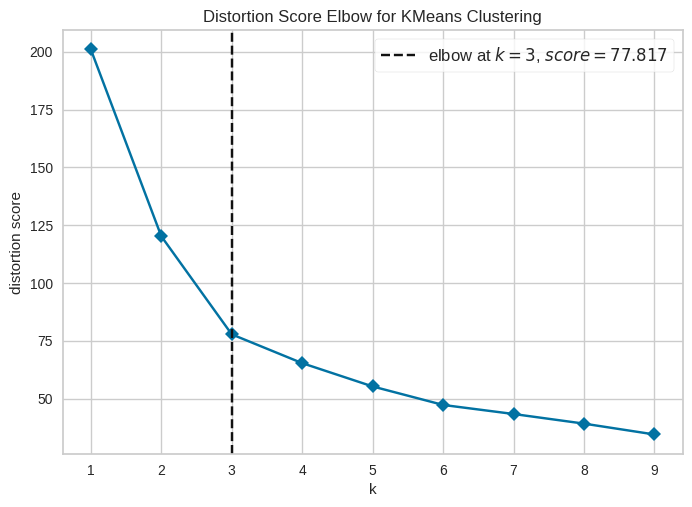

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [54]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10), timings= False)
visualizer.fit(df3_scaled)
visualizer.show()

In [55]:
num_clusters_range = range(2, 10)
silhouette_scores = []

for num_clusters in num_clusters_range:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=1000, n_init=10)
    kmeans.fit(df3)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(df3, cluster_labels)
    silhouette_scores.append(silhouette_avg)

    print("For n_clusters={0}, the silhouette score is {1:.4f}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.9560
For n_clusters=3, the silhouette score is 0.9096
For n_clusters=4, the silhouette score is 0.8522
For n_clusters=5, the silhouette score is 0.8317
For n_clusters=6, the silhouette score is 0.7382
For n_clusters=7, the silhouette score is 0.6937
For n_clusters=8, the silhouette score is 0.6357
For n_clusters=9, the silhouette score is 0.6323


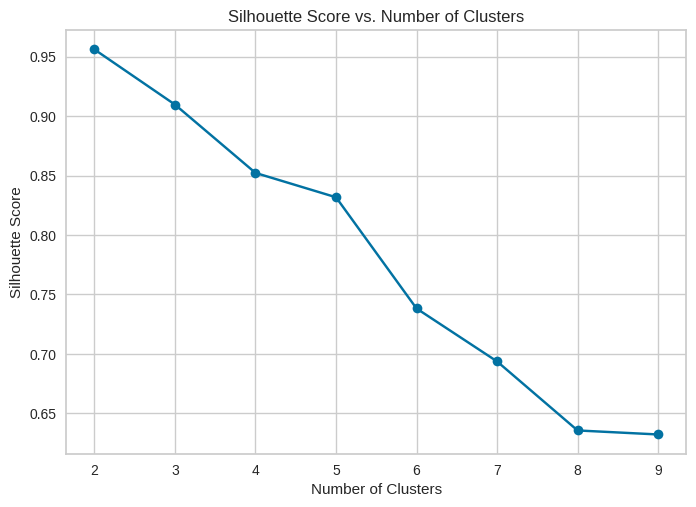

In [56]:
plt.plot(num_clusters_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()

Nilai shilhouette tertinggi ada pada 2 - 4 clusters

Maka kita dapat membagi cluster menjadi 2 atau 4

untuk saat ini kita akan coba membagi menjadi 2 cluster

In [57]:
n_clust2 = 2
n_clust3 = 3
n_clust4 = 4

# 3 CLUSTER

In [58]:
df3_scaled.head()

,Recency,Frequency,Monetary,R_quart,F_quart,M_quart,RFMScore
Nama Barang,,,,,,,
AQUA AIR MINERAL TIRTA 19L,0.027778,0.004608,0.000513,0.666667,0.000000,0.000000,0.600601
AQUA MINERAL CUP 220ML,0.000000,0.018629,0.007558,1.000000,0.333333,0.666667,0.936937
ASPRO BOLD 20 S,0.000000,0.144132,0.015564,1.000000,1.000000,1.000000,1.000000
AYAM UNGKEP PAWON,0.222222,0.188156,0.047695,0.000000,1.000000,1.000000,0.099099
BEBEK UNGKEP PAWON,0.416667,0.115600,0.001699,0.000000,1.000000,0.000000,0.090090


In [59]:
df33 = df3_scaled.copy()
df33.head()

,Recency,Frequency,Monetary,R_quart,F_quart,M_quart,RFMScore
Nama Barang,,,,,,,
AQUA AIR MINERAL TIRTA 19L,0.027778,0.004608,0.000513,0.666667,0.000000,0.000000,0.600601
AQUA MINERAL CUP 220ML,0.000000,0.018629,0.007558,1.000000,0.333333,0.666667,0.936937
ASPRO BOLD 20 S,0.000000,0.144132,0.015564,1.000000,1.000000,1.000000,1.000000
AYAM UNGKEP PAWON,0.222222,0.188156,0.047695,0.000000,1.000000,1.000000,0.099099
BEBEK UNGKEP PAWON,0.416667,0.115600,0.001699,0.000000,1.000000,0.000000,0.090090


In [60]:
kmeans3 = KMeans(n_clusters=n_clust3, max_iter=1000, n_init=10)
kmeans3.fit(df3_scaled)
print(kmeans3.labels_)

[0 0 1 2 2 0 1 2 1 1 1 2 1 1 0 1 1 0 1 0 0 1 2 0 1 0 1 1 0 0 0 2 1 1 1 1 2
 2 0 1 1 1 0 1 0 1 2 0 1 2 0 0 2 2 0 0 2 2 0 1 1 1 1 1 1 1 2 2 2 1 1 1 2 2
 0 0 1 0 1 1 2 0 0 0 2 1 2 1 0 1 0 0 0 2 2 0 0 0 2 0 1 1 1 1 1 1 2 0 0 0 0
 0 1 0 0 2 1 2 0 0 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 0 2 0 0 1 2 2 2 0 0
 0 1 0 1 1 2 2 1 0 0 0 2 1 0 2 1 0 1 1 1 0 2 0 1 1 1 1 0 1 0 0 1 0 0 0 1 1
 0 0 0 2 2 2 0 0 2 2 0 2 0 2 0 0 2 2 0 1 1 2 0 2 0 2 1 1 1 0 1 2 0 0 1 0 0
 2 0 0 0 0 2 2 1 2 1 2 0 0 0 1 2 2 1 1 1 0 0 0 0 0 1 2 2 2 2 2 2 2 2 0 1 2
 1 1 1 2 0 1 1 1 1 1 1 0 0 1 0 0 0 0 1 0 2 0 2 2 0 1 2 0 1 1 1 0 0 2 0 0 0
 2 0 0 0 2 0 0 1 1 1 0 2 1 0 1 1 0 1 0 0 0 1 1 1 1 0 2 0 2 1 0 0 1 2 0 1 1
 0 2 2 1 2 0 1 0 0 1 1 1 1 2 1 0 1 2 1 1 1 0 0 0 0 1 0 1 2 0 2 0 0 0 0 0 0
 2 0 1 1 2 1 0 1 2 2 2 2 2]


In [61]:
df33['Labels'] = kmeans3.labels_
df33.head()

,Recency,Frequency,Monetary,R_quart,F_quart,M_quart,RFMScore,Labels
Nama Barang,,,,,,,,
AQUA AIR MINERAL TIRTA 19L,0.027778,0.004608,0.000513,0.666667,0.000000,0.000000,0.600601,0
AQUA MINERAL CUP 220ML,0.000000,0.018629,0.007558,1.000000,0.333333,0.666667,0.936937,0
ASPRO BOLD 20 S,0.000000,0.144132,0.015564,1.000000,1.000000,1.000000,1.000000,1
AYAM UNGKEP PAWON,0.222222,0.188156,0.047695,0.000000,1.000000,1.000000,0.099099,2
BEBEK UNGKEP PAWON,0.416667,0.115600,0.001699,0.000000,1.000000,0.000000,0.090090,2


In [62]:
df33['Labels'].value_counts()

0    153
1    138
2     92
Name: Labels, dtype: int64

In [63]:
df33.to_excel('hasil_cluster3.xlsx')

# LABELING

In [64]:
# Kelompokkan data berdasarkan kolom 'Labels'
clustered_data = df33.groupby('Labels')

# Hitung rata-rata dari masing-masing cluster
average_rfm2 = clustered_data[['Recency', 'Frequency', 'Monetary']].mean()
average_rfm2

,Recency,Frequency,Monetary
Labels,,,
0,0.015432,0.017539,0.005076
1,0.011876,0.112062,0.046102
2,0.117452,0.025696,0.005773


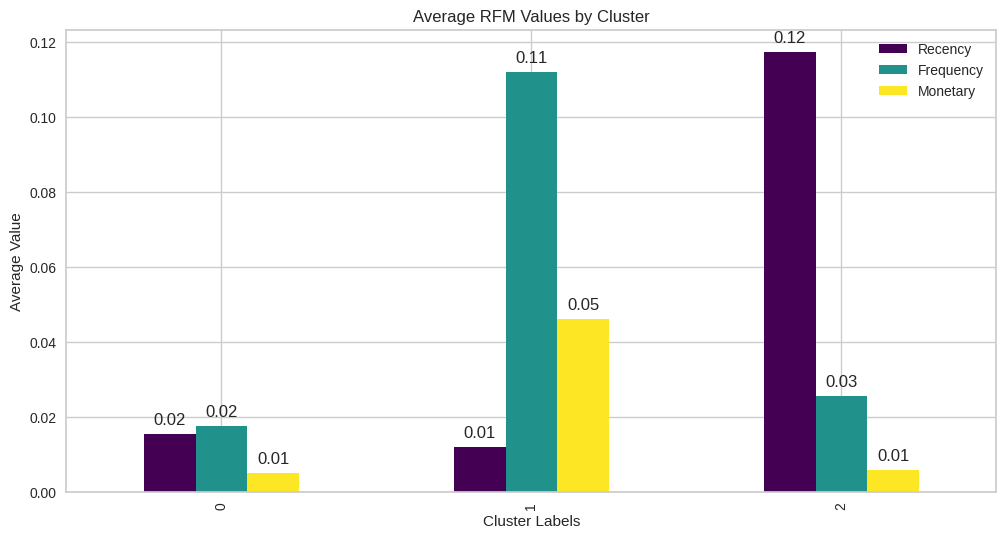

In [65]:
# Buat bar plot untuk menampilkan hasil dari average_rfm2
ax = average_rfm2.plot(kind='bar', figsize=(12, 6), colormap='viridis')

# Tambahkan label dan judul
plt.title('Average RFM Values by Cluster')
plt.xlabel('Cluster Labels')
plt.ylabel('Average Value')

# Tampilkan legenda
plt.legend(["Recency", "Frequency", "Monetary"])

# Anotasi untuk menampilkan nilai pada setiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Tampilkan plot
plt.show()

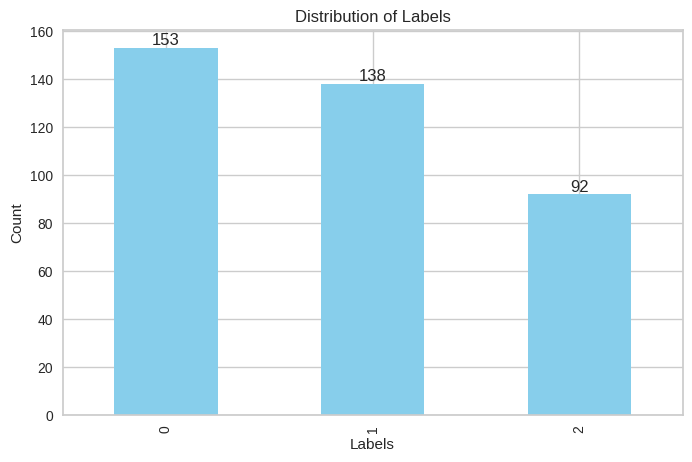

In [66]:
plt.figure(figsize=(8, 5))
df33['Labels'].value_counts().sort_index().plot(kind='bar', color='skyblue')

# Anotasi untuk setiap bar
for i, count in enumerate(df33['Labels'].value_counts().sort_index()):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

# Tambahkan judul dan label
plt.title('Distribution of Labels')
plt.xlabel('Labels')
plt.ylabel('Count')

# Tampilkan plot
plt.show()

# VISUALISASI HASIL CLUSTER

<Axes: xlabel='Monetary', ylabel='Recency'>

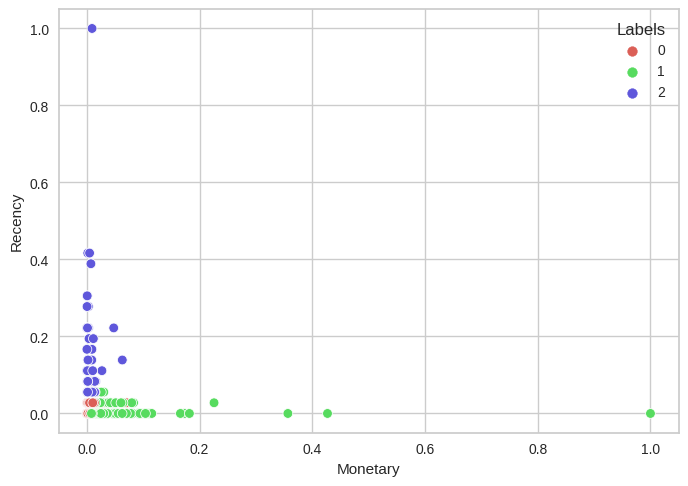

In [67]:
sns.scatterplot(x=df33['Monetary'], y=df33['Recency'], hue=df33['Labels'], palette=sns.color_palette('hls', n_colors=n_clust3))

<Axes: xlabel='Monetary', ylabel='Frequency'>

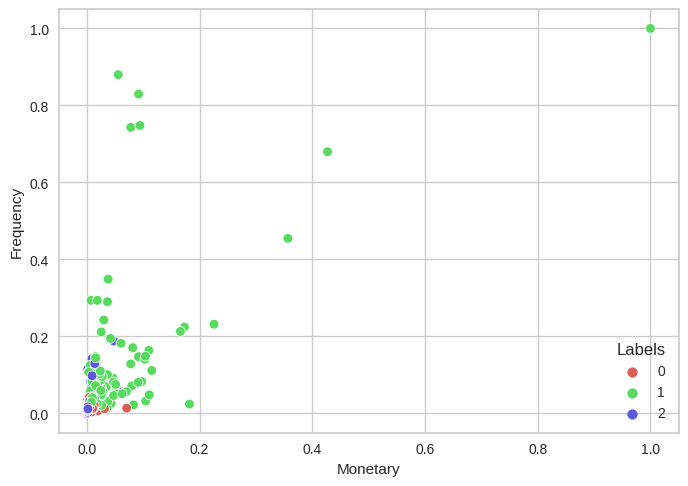

In [68]:
sns.scatterplot(x=df33['Monetary'], y=df33['Frequency'], hue=df33['Labels'], palette=sns.color_palette('hls', n_colors=n_clust3))

<Axes: xlabel='Frequency', ylabel='Recency'>

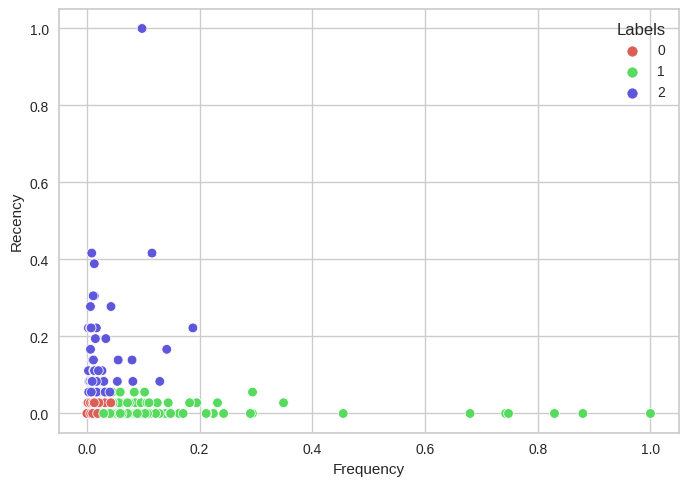

In [69]:
sns.scatterplot(x=df33['Frequency'], y=df33['Recency'], hue=df33['Labels'], palette=sns.color_palette('hls', n_colors=n_clust3))

<Axes: xlabel='Monetary', ylabel='Frequency'>

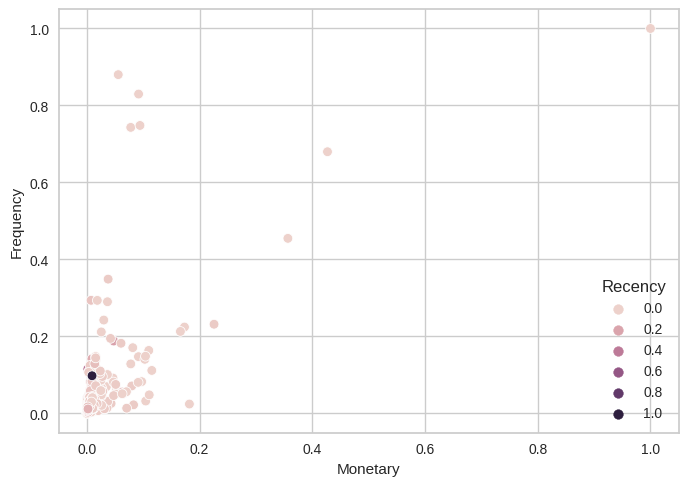

In [70]:
sns.scatterplot(x=df33['Monetary'] ,y=df33['Frequency'], hue = df33['Recency'])

Text(0.5, 0, 'Total Belanja')

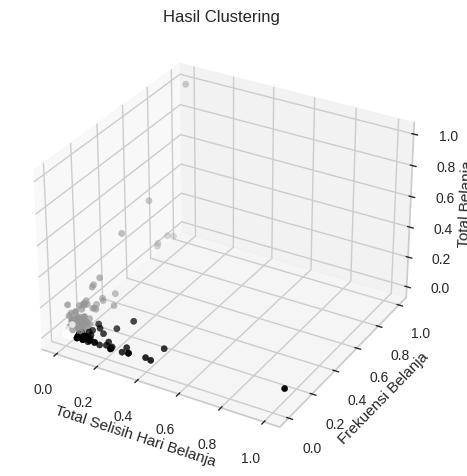

In [71]:
# buat 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=df33['Recency'], ys=df33['Frequency'], zs=df33['Monetary'], c=df33['Labels'])

plt.title('Hasil Clustering')
ax.set_xlabel('Total Selisih Hari Belanja')
ax.set_ylabel('Frekuensi Belanja')
ax.set_zlabel('Total Belanja')